In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Data Analysis/Customer Segmentation/Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## **Exploratory Data Analysis (EDA)**
Univariant Analysis

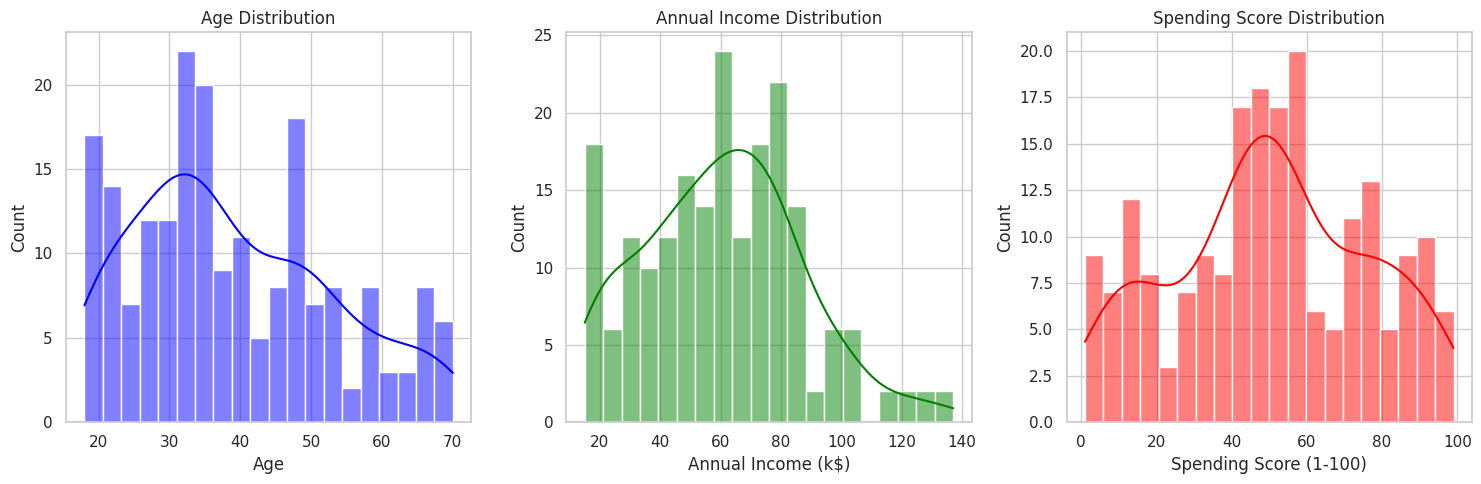

In [7]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Plot distributions
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['Age'], kde=True, bins=20, color='blue')
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['Annual Income (k$)'], kde=True, bins=20, color='green')
plt.title('Annual Income Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['Spending Score (1-100)'], kde=True, bins=20, color='red')
plt.title('Spending Score Distribution')

plt.tight_layout()
plt.show()

correction analysis

In [8]:
df = df.drop('CustomerID', axis=1) #CustomerId is not needed in the analysis

In [9]:
df['Gender'].value_counts(normalize = True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

In [10]:
# Convert 'Gender' column to a numerical representation
df['Gender_Encoded'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Drop the original 'Gender' column
df = df.drop('Gender', axis=1)

Creating any new feature/column 'Gender Encoder' (Male = 0, Female = 1) in order to produce correlation heatmap as the datatype is float and the dropping already present 'Gender' column

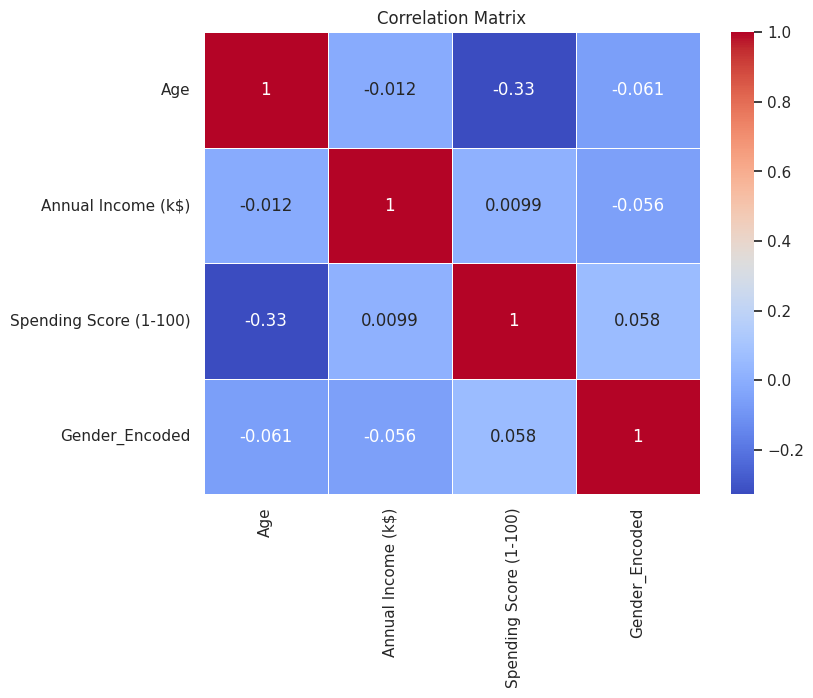

In [11]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

The correlation matrix provides insights into the relationships between the variables:

Age vs. Spending Score: There is a moderate negative correlation (-0.327) between age and spending score, suggesting that younger customers tend to have higher spending scores.

Annual Income vs. Other Variables: The correlations between annual income and other variables are relatively weak, indicating that income does not strongly predict age, spending score, or gender.

Gender vs. Spending Score: A slight positive correlation (0.058) suggests that gender may have a minor influence on spending scores, although the relationship is not strong.

# Box Plots for Outlier Detection

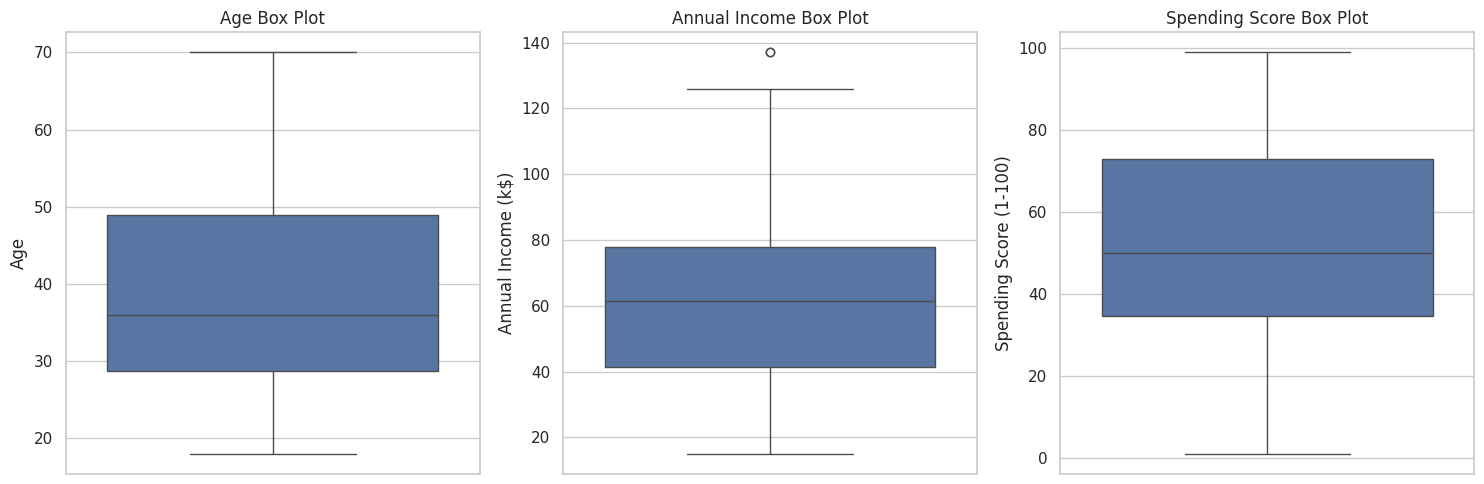

In [12]:
# Plot box plots for numerical features
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(df['Age'])
plt.title('Age Box Plot')

plt.subplot(1, 3, 2)
sns.boxplot(df['Annual Income (k$)'])
plt.title('Annual Income Box Plot')

plt.subplot(1, 3, 3)
sns.boxplot(df['Spending Score (1-100)'])
plt.title('Spending Score Box Plot')

plt.tight_layout()
plt.show()

An outlier was detected in the annual income data, with some customers earning above $130k. Outliers can significantly impact the performance of clustering algorithms, especially those based on distance measures. It's important to consider how these outliers are handled in the analysis.

# Data Preprocessing

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# Standardize the numerical features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

data_scaled_df = pd.DataFrame(df_scaled, columns=df.columns)

Standardizing the data to prepare for clustering

# Model Development

Choosing the Number of Clusters:
Using the Elbow Method or Silhouette Analysis to determine the optimal number of clusters.

## K-mean clustering

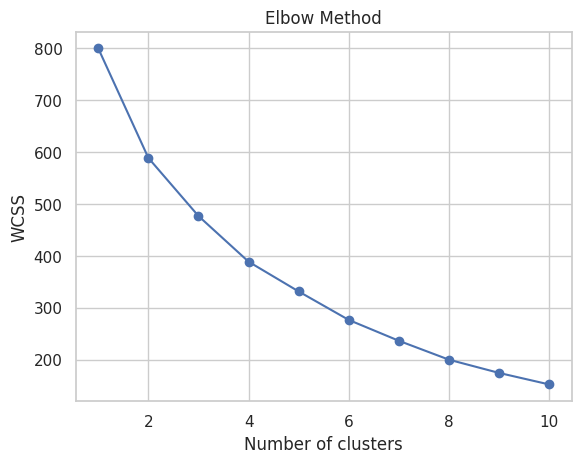

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Determine the optimal number of clusters using the Elbow Method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_scaled_df)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [15]:
# Applying KMeans to the dataset
optimal_clusters = 5  # Set this based on the elbow method result
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(data_scaled_df)

In [16]:
# Silhouette Score
silhouette_avg = silhouette_score(data_scaled_df, df['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.3040600988258827


The silhouette score of 0.317 suggests that the clusters formed are somewhat distinct but not perfectly separated. A score closer to 1 indicates well-separated clusters, while a score closer to -1 indicates overlapping clusters. In this case, there may be some overlap or ambiguity in the clustering, indicating potential areas for refinement.

# Cluster Analysis and Visualization

         Age  Annual Income (k$)  Spending Score (1-100)  Gender_Encoded
0  32.692308           86.538462               82.128205        0.538462
1  36.482759           89.517241               18.000000        0.551724
2  49.813953           49.232558               40.069767        1.000000
3  24.907407           39.722222               61.203704        0.592593
4  55.714286           53.685714               36.771429        0.000000


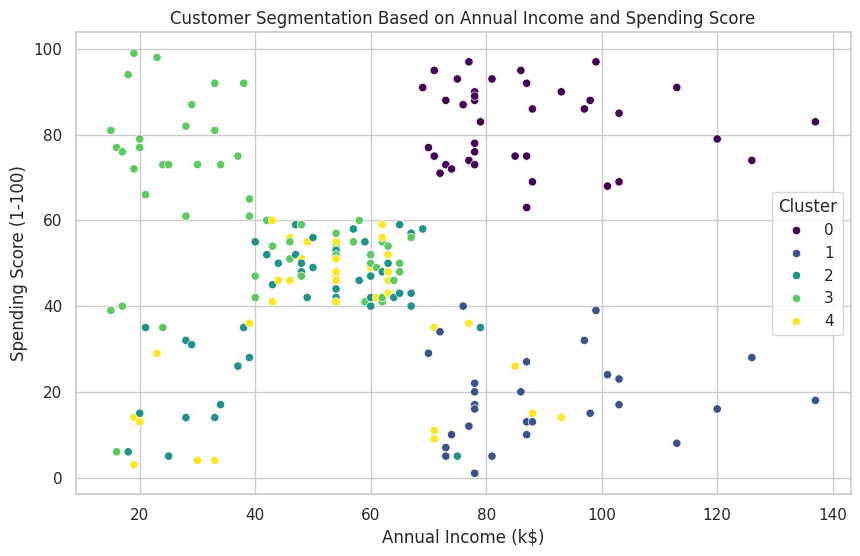

In [17]:
# Analyzing the characteristics of each cluster
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=df.columns[:-1])
print(cluster_centers)

# Visualizing clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'],
                hue=df['Cluster'], palette='viridis')
plt.title('Customer Segmentation Based on Annual Income and Spending Score')
plt.show()

# Cluster Centers

The cluster centers provide the mean values of the features for each cluster, giving us a profile of the typical customer in each group:

Cluster 0: Younger customers (mean age 28) with average income ($60k) and higher spending scores (~68), predominantly encoded as male.

Cluster 1: Similar to Cluster 0 but with slightly higher spending scores (~71), predominantly encoded as female.

Cluster 2: Older customers (mean age 48) with lower income ($46k) and moderate spending scores (~39), predominantly encoded as male.

Cluster 3: Older customers (mean age 55) with similar income to Cluster 2 ($48k) and lower spending scores (~38), predominantly encoded as female.

Cluster 4: Middle-aged customers (mean age 40) with higher income ($90k) but much lower spending scores (~15), mixed gender. Visualization: Customer Segmentation Based on Annual Income and Spending Score

## Spending Score

The scatter plot visually represents customer segmentation, with color-coded clusters based on their annual income and spending score. The plot reveals distinct groups, with some overlap, particularly in the middle-income range. This visualization helps stakeholders quickly grasp the differences between customer segments.

## Summary of Findings

Customer Segmentation: Five distinct customer segments were identified based on age, income, spending score, and gender. Cluster Characteristics: The clusters vary significantly in age, income, and spending behavior, with notable differences in gender distribution.

## Recommendations

Targeted Marketing:

High Income, Low Spending (Cluster 4): Consider marketing strategies that encourage higher spending, such as exclusive promotions or loyalty programs.

Young, High Spending (Clusters 0 and 1): Focus on maintaining engagement and offering value-added services or products that align with their spending habits.

Product Development:

Develop products or services tailored to the specific needs of each segment, particularly those with distinct spending behaviors or income levels.

Customer Retention:

For clusters with lower spending scores, explore opportunities to increase customer engagement and spending, potentially through personalized offers or improved customer experience.